## SCHRODINGER’S EQUATION

$$-ih u_{t}(x,y,z,t) = \frac{h^2}{2m} u_{xx}(x,y,z,t)+ \frac{e^2}{r}u(x,y,z,t)$$
The potential $\frac{e^2}{r}$ is a variable coefficient.
So, let’s take the free Schrodinger equation $$-i u_{t}(x,y,z,t) = \frac{1}{2} u_{xx}(x,y,z,t)$$
in three dimensions, where we’ve set $h = m = 1$ and dropped the potential term. It looks like the diffusion equation.

\begin{align*}
-i u_{t}(x,y,z,t) &= \frac{1}{2} u_{xx}(x,y,z,t)\\
-i u_{t}(x,y,z,t) - \frac{1}{2} u_{xx}(x,y,z,t)&=0\\
\end{align*}
and also setting $k = \frac{i}{2}$ we have the equation: 
$$ u_{t}(x,y,z,t) - k u_{xx}(x,y,z,t)=0$$
or : $$ u_{t} - k \Delta u =0 $$

with $$u=0, \quad \text{in}\quad \partial \Omega$$
In the weak form : 
Let $v \in H'_{0}(\Omega)$

\begin{align*}
\int_{\Omega}u_{t}v dV - k \int_{\Omega}\Delta u v dV&= 0 \\
\int_{\Omega}u_{t}v dV -k \int_{\Omega}\nabla u \cdot \nabla v dV& - k\int_{\partial \Omega} \nabla u \cdot \vec{n}v dS &= 0 \\
\int_{\Omega}u_{t}v +k\int_{\Omega}\nabla u \cdot \nabla v dV &=0 
\end{align*}


In [52]:
import skfem as fem
from skfem.helpers import dot, grad  # helpers make forms look nice

@fem.BilinearForm
def a(u, v, w):
    kappa = (1j)/2
    return kappa*(dot(grad(u), grad(v)))

In [53]:
import numpy as np
@fem.LinearForm
def L(v, w):
    return  0

In [54]:
mesh = fem.MeshTri()  
mesh.refine(3)

In [55]:
Vh = fem.InteriorBasis(mesh, fem.ElementTriP1())

In [56]:
A = a.assemble(Vh)
l = L.assemble(Vh)
A.shape
l.shape

(81,)

In [57]:
D = Vh.get_dofs()
D.flatten()

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 13, 14, 16, 17, 18, 25,
       26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 40, 49, 50, 53, 54])

In [58]:
system = fem.condense(A, l, D=D)
system[0].shape
system[1].shape

(49,)

In [59]:
x = fem.solve(*system)
x.shape

(81,)

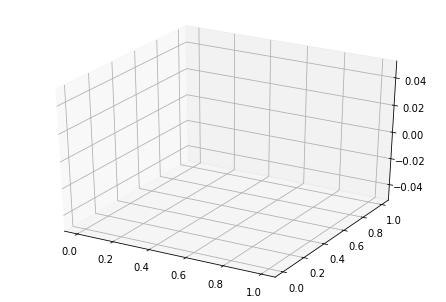

In [60]:
if __name__ == "__main__":
    from os.path import splitext
    from sys import argv
    from skfem.visuals.matplotlib import plot3, show
    plot3(mesh, x)
    show()